# Métodos para encontrar raízes #


Neste Notebook, vamos implementar os métodos de encotrar raízes vistos nas últimas aulas. Além disto, faremos experimentos para medir a __quanto tempo__ cada método está levando com a biblioteca timeit


Para começar, reaproveite seu método da bissecção e o adicione abaixo. Implemente também o método das secantes: 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def bissecao(f,a,b, niter = 1000,minimo = 0.000001, proximidadeIter = 0.000001) :
    chute0 = i = 0
    
    while(i <= niter) :
        chute = (a + b)/2
        
        if (f(chute) == 0) or (np.abs(chute) <= minimo) or (np.abs(f(chute) - f(chute0)) <= proximidadeIter) :
            break
        elif ((f(a) * f(chute)) < 0) :
            b = chute
        elif ((f(chute) * f(b)) < 0) :
            a = chute
            
        chute0 = chute
        i += 1
        
    return (chute,i)

def secantes(f,a,b, niter = 1000,minimo = 0.000001, proximidadeIter = 0.000001) :
    i = aux = 0
    chute0 = a
    chute = b
    
    while(i <= niter) :
        aux = chute - (f(chute) * (chute - chute0))/(f(chute) - f(chute0))
        
        if((np.abs(chute) <= minimo) or (np.abs(f(chute) - f(chute0)) <= proximidadeIter)) :
            break
            
        chute0 = chute
        chute = aux

        i += 1
    
    return (chute,i)

Para verificar que seu método está funcionando de fato, faça uma versão com gráficos. Faça a bissecção plotar um gráfico com a função, as três primeiras tentativas de raiz e a última. Faça a mesma coisa para o método das secantes, plotando as três primeiras retas geradas e o ponto final. Teste seu método na função $x^{2}sen(2)$ no intervalo de 2.1 a 4.2

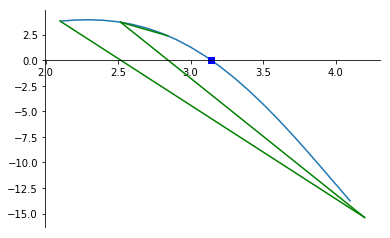

(3.1415926535897936, 9)

In [26]:
def func(x) :
    return ((x**2) * (np.sin(x)))

def bisseccaog(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    
    chute0 = i = 0
    vreta = np.arange(a,b,0.1)
    plt.plot(vreta,f(vreta))
    
    while(i <= niter) :
        chute = (a + b)/2
        
        if (f(chute) == 0) or (np.abs(chute) <= minimo) or (np.abs(f(chute) - f(chute0)) <= proximidadeIter) :
            break
        elif ((f(a) * f(chute)) < 0) :
            b = chute
        elif ((f(chute) * f(b)) < 0) :
            a = chute
        
        if (i < 3) :
            plt.plot(chute, 0, 'bs')
            
        chute0 = chute
        i += 1
        
    plt.plot(chute, 0, 'bs') 
    plt.show()
    
    return (chute,i)

def secantesg(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    
    i = aux = 0
    chute0 = a
    chute = b
    vreta = np.arange(a,b,0.1)
    plt.plot(vreta,f(vreta))
    
    while(i <= niter) :
        aux = chute - (f(chute) * (chute - chute0))/(f(chute) - f(chute0))
        
        if((np.abs(chute) <= minimo) or (np.abs(f(chute) - f(chute0)) <= proximidadeIter)) :
            break
        
        if (i < 3) :
            plt.plot([chute0,chute],[f(chute0),f(chute)],'g') 
        
        chute0 = chute
        chute = aux

        i += 1
        
    plt.plot([chute0,chute],[f(chute0),f(chute)],'bs') #essa aqui é a raiz
    plt.show()
    
    return (chute,i)
secantesg(func,2.1,4.2)

Faça agora o mesmo para o Regula Falsi:

In [49]:
def falsi(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001) :
    chute = i = 0
    
    while((i <= niter) or (np.abs(chute) <= minimo)) :
        
        if ((f(a)* f(b)) < 0) :
            chute = ((a * f(b)) - (b * f(a)))/(f(b) - f(a))
            
            if (f(a) * f(chute) < 0) :
                b = chute
            else :
                a = chute
        i += 1
    
    return (chute, i)

def falsig(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    
    vreta = np.arange(a,b,0.1)
    plt.plot(vreta,f(vreta))
    chute = i = 0
    
    while((i <= niter) or (np.abs(chute) <= minimo)) :
        
        if ((f(a)* f(b)) < 0) :
            chute = b - ((f(b)/(f(b)-f(a)))*(b-a))
            #chute = ((a * f(b)) - (b * f(a)))/(f(b) - f(a))
            
            if (i < 3):
                plt.plot([a,b],[f(a),f(b)],'g')
            
            if (f(a) * f(chute) < 0) :
                b = chute
            else :
                a = chute
        i += 1
    
    plt.plot(chute, 0, "bs")
    plt.show()
    return (chute, i)

In [42]:
def falsi1(f,a,b, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    mant = 1e9
    iiter = niter
    niter = 0
    fa=f(a)
    fb=f(b)
    m=b-(fb/(fb-fa))*(b-a)
    fm = f(m)
    while abs(fm)>minimo and iiter>0 and abs(m-mant)>proximidadeIter:
        if(fa*fm>0):
            fa=fm
            a=m
        else:
            fb=fm
            b=m
        mant = m
        m=b-(fb/(fb-fa))*(b-a)
        fm = f(m)
        iiter-=1
        niter+=1
    raiz=m
    return raiz,niter

### Método de Newton ###

O método de newton é ligeiramente diferente. Ele precisa apenas de um ponto para fazer achar a nova tentativa de raiz, ao invés de um intervalo. Um exemplo gráfico do funcionamento dele:

https://commons.wikimedia.org/wiki/File:NewtonIteration_Ani.gif

Em contrapartida, o método de Newton precisa de um argumento extra: A derivada da função que se deseja achar a a raiz.

Implemente as duas versões do método de newton, com e sem gráficos:

In [47]:
def newton(f,fd,x, niter = 1000,minimo = 0.000001, proximidadeIter = 0.000001):
    i = chute = 0
    
    while((i <= niter)):
        chute = x - (f(x)/fd(x))
        
        if ((np.abs(f(chute)) <= minimo) or (np.abs(f(chute) - f(x)) <= proximidadeIter)) :
            break
        
        x = chute
        i += 1
    
    return chute,i

def newtong(f,fd,x, niter=1000,minimo = 0.000001, proximidadeIter = 0.000001):
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    
    vreta = np.arange(2.1,4.2,0.1)
    plt.plot(vreta,f(vreta))
    
    i = chute = 0
    
    while((i <= niter)):
        chute = x - (f(x)/fd(x))
        
        if ((np.abs(f(chute)) <= minimo) or (np.abs(f(chute) - f(x)) <= proximidadeIter)) :
            break
            
        if i < 3:
            plt.plot([chute,x],[x,0],'g')
        
        x = chute
        i += 1
        
    plt.plot([chute,x],[x,0],'g')
    plt.plot(chute,0,'bs')
    plt.show()
    
    return chute,i


Teste o método de Newton e o Regula Falsi com a função $x^{2}sen(2)$ no intervalo de 2.1 a 4.2 (escolha qualquer um dos dois pontos para Newton:

(3.141592653758602, 3)
(3.141592653589793, 1001)


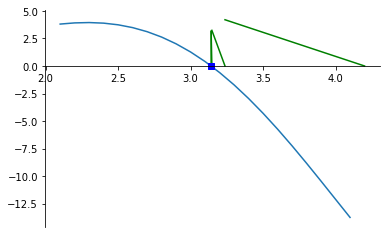

(3.141592653758602, 3)

In [50]:
def derFunc(x) :
    return ((2*x) * (np.sin(x)) + ((x**2) * np.cos(x)))


print(newton(func, derFunc, 4.2))
print(falsi(func,2.1,4.2))

newtong(func, derFunc,4.2)

Com todos os métodos implementados, vamos agora ver qual é o melhor em cada cenário. Para isto, vamos ver, além da raiz gerada e do número de iterações, o tempo levado para encontrar a raiz. Para isto, usaremos a biblioteca timeit

In [7]:
def f(x):
    return x^2

%timeit -n10000000 f(10)

93.8 ns ± 3.39 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Como você pode ver, demorou um pouquinho né? Isso porque aquele parametro -n está dizendo para o timeit quantas vezes ele deve rodar o comando f(10), e mostra a média e o desvio padrão de 7 rodadas de 10000000 repetições.


Agora, vamos ao exercício: __você deve encontrar um intervalo onde há uma raiz__ (seja plotando ou usando lagrange), rodar e verificar o tempo de execução, distância da raiz achada de 0 e o número de iterações da bissecção, secantes, regula falsi e Newton para as seguintes funções:

1: $f_1(x) = 2x^4 + 4x^3 + 3x^2-10x-15$

2: $f_2(x) = x^5-2x^4-9x^3+22x^2+4x-24$  

3: $f_3(x) = 5x^3+x^2-e^{1-2x}+cos(x)+20$

4: $f_4(x) = sen(x)x+4$

5: $f_5(x) = (x-3)^5ln(x)$

Entrega: Quinta-Feira, 24/4 via Colabweb

In [8]:
def indicePrimeiroNeg(coef):
    for i in range((len(coef) - 1), -1, -1):
        if coef[i] < 0 :
            return i

def lagrange(coef):
    if coef[-1] < 0 :
        coef *= (-1)
    return (1 + ((-1 * min(coef))/coef[-1])**(1.0/((len(coef) - 1) - indicePrimeiroNeg(coef))))

def inverteIndiceImpar(coef):
    cop = coef.copy() #se eu não copiar o vetor e alterar a 'cópia' ele vai alterar o vetor original e dar valores alterados
    for i in range(0, len(coef)):
        if (i % 2) != 0 :
            cop[i] *= (-1)
    return cop

def limiteSupPos(coef): # 4,46
    return lagrange(coef)

def limiteInfPos(coef): #1/2,6 = 0,38
    return (1/(lagrange(np.flip(coef,axis = 0))))

def limiteSupNeg(coef): # -1,90
    return ((-1) * lagrange(inverteIndiceImpar(np.flip(coef, axis = 0))))

def limiteInfNeg(coef):#-1/10 = -0,1
    return (-1/(lagrange(inverteIndiceImpar(coef))))

def limites(coef):
    return (limiteSupNeg(coef), limiteInfNeg(coef), limiteInfPos(coef), limiteSupPos(coef))

### Quesito 1 : $f_1(x) = 2x^4 + 4x^3 + 3x^2-10x-15$

In [12]:
pol = [-15,-10,3,4,2]
lim = limites(pol)

def func1(x) :
    return (2*(x**4) + 4*(x**3) + 3*(x*x) - 10*x - 15)

def derFunc1(x) :
    return (8*(x**3) + 12*(x**2) + 6*x - 10)


raiz = bissecao(func1,lim[0],lim[3])
%timeit -n100 raiz

print("Bissecção = Raiz :", str(raiz[0]) + "; Iterações :"+ str(raiz[1]) + "; Dist. 0 :"+ str(0 - func1(raiz[0])))
print()

raiz = secantes(func1,lim[0],lim[3])
%timeit -n100 raiz

print("Secantes = Raiz :", str(raiz[0]) + "; Iterações :"+ str(raiz[1]) + "; Dist. 0 :"+ str(0 - func1(raiz[0])))
print()

#raiz = falsi(func1,lim[0],lim[3])
#%timeit -n100 raiz

#print("Regula Falsi = Raiz :", str(raiz[0]) + "; Iterações :"+ str(raiz[1]) + "; Dist. 0 :"+ str(0 - func1(raiz[0])))
#print()

raiz = newton(func1,derFunc1,lim[0])
%timeit -n100 raiz

print("Newton = Raiz :", str(raiz[0]) + "; Iterações :"+ str(raiz[1]) + "; Dist. 0 :"+ str(0 - func1(raiz[0])))
print()

18.6 ns ± 1.47 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
Bissecção = Raiz : -1.3003841301245398; Iterações :26; Dist. 0 :3.8047431871746085e-08

18.5 ns ± 1.18 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
Secantes = Raiz : -1.3003841326439198; Iterações :9; Dist. 0 :-1.7763568394002505e-15

31.7 ns ± 8.75 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
Newton = Raiz : -1.300384132653985; Iterações :3; Dist. 0 :-1.5200285474747943e-10



### Quesito 2 : $f_2(x) = x^5-2x^4-9x^3+22x^2+4x-24$  

In [15]:
pol = [-24,4,22,-9,-2,1]
lim = limites(pol)

def func2(x) :
    return (x**5 - 2*(x**4) - 9*(x**3) + 22*(x**2) + 4*x - 24)

def derFunc2(x) :
    return (5*(x**4) - 8*(x**3) - 27*(x**2) + 44*x + 4)


raiz = bissecao(func1,lim[0],lim[3])
%timeit -n100 raiz

ValueError: min() arg is an empty sequence

### Quesito 3 : $f_3(x) = 5x^3+x^2-e^{1-2x}+cos(x)+20$

In [18]:
pol = [-24,4,22,-9,-2,1]
lim = limites(pol)
lim

ValueError: min() arg is an empty sequence